In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/classificationtree_Ex1.csv')
df

,cid,gender,R,F,M,customer_value
0,0S3670071489,F,586,1,1380,L
1,0S3687895473,M,12,1,1186,L
2,0S3690675977,F,75,2,2850,H
3,2009S2044237,F,657,1,1099,L
4,2009S2044261,M,145,1,1360,L
...,...,...,...,...,...,...
43667,S201S242852053,F,211,1,678,L
43668,S201S280812053,F,109,2,3120,H
43669,S201S280816053,M,313,1,780,L
43670,S201S280840053,M,33,1,150,L


In [3]:
CustomerData = df[['R', 'F', 'M']]
CustomerData = np.array(CustomerData)
CustomerData[:5]

array([[ 586,    1, 1380],
       [  12,    1, 1186],
       [  75,    2, 2850],
       [ 657,    1, 1099],
       [ 145,    1, 1360]])

In [4]:
CustomerTagret = df['customer_value']
CustomerTagret = np.array(CustomerTagret)
CustomerTagret[:5]

array(['L', 'L', 'H', 'L', 'L'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData,
    CustomerTagret,
    train_size = 0.75,
    stratify = CustomerTagret,
    random_state=42
)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

32754
10918
32754
10918


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
myDT = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
myDT

DecisionTreeClassifier(max_depth=3)

In [9]:
myDT.fit(X_train, y_train)
myDT

DecisionTreeClassifier(max_depth=3)

In [10]:
y_pred = myDT.predict(X_test)
y_pred

array(['L', 'L', 'H', ..., 'L', 'L', 'L'], dtype=object)

In [11]:
from sklearn import metrics

In [12]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.99


In [13]:
mycm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', mycm)

Confusion Matrix: 
 [[2694   47]
 [  13 8164]]


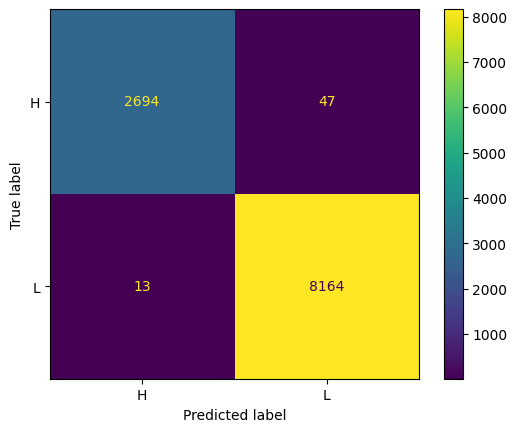

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X, y = make_classification(random_state=0)

cm = confusion_matrix(y_test, y_pred, labels=myDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=myDT.classes_)
disp.plot()

In [19]:
newdata=[[5.0,2.0,2100]]
print(newdata)
y_newpred_c = myDT.predict(newdata)
print(y_newpred_c)

[[5.0, 2.0, 2100]]
['L']


In [20]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[2] <= 2682.0\ngini = 0.376\nsamples = 32754\nvalue = [8223, 24531]'),
 Text(0.25, 0.625, 'x[2] <= 2476.5\ngini = 0.035\nsamples = 24808\nvalue = [442, 24366]'),
 Text(0.125, 0.375, 'x[2] <= 2337.5\ngini = 0.007\nsamples = 23935\nvalue = [90, 23845]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 23376\nvalue = [4, 23372]'),
 Text(0.1875, 0.125, 'gini = 0.26\nsamples = 559\nvalue = [86, 473]'),
 Text(0.375, 0.375, 'x[0] <= 345.0\ngini = 0.481\nsamples = 873\nvalue = [352, 521]'),
 Text(0.3125, 0.125, 'gini = 0.049\nsamples = 515\nvalue = [13, 502]'),
 Text(0.4375, 0.125, 'gini = 0.101\nsamples = 358\nvalue = [339, 19]'),
 Text(0.75, 0.625, 'x[2] <= 2851.0\ngini = 0.041\nsamples = 7946\nvalue = [7781, 165]'),
 Text(0.625, 0.375, 'x[0] <= 148.5\ngini = 0.364\nsamples = 665\nvalue = [506, 159]'),
 Text(0.5625, 0.125, 'gini = 0.228\nsamples = 175\nvalue = [23, 152]'),
 Text(0.6875, 0.125, 'gini = 0.028\nsamples = 490\nvalue = [483, 7]'),
 Text(0.875, 0.375, 'x[2] <= 2877

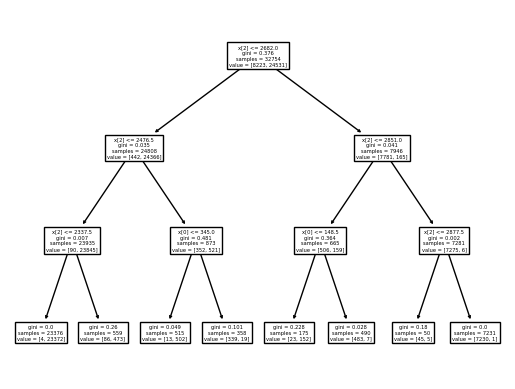

In [21]:
plot_tree(myDT)
#plot_tree(myDT,filled=True)

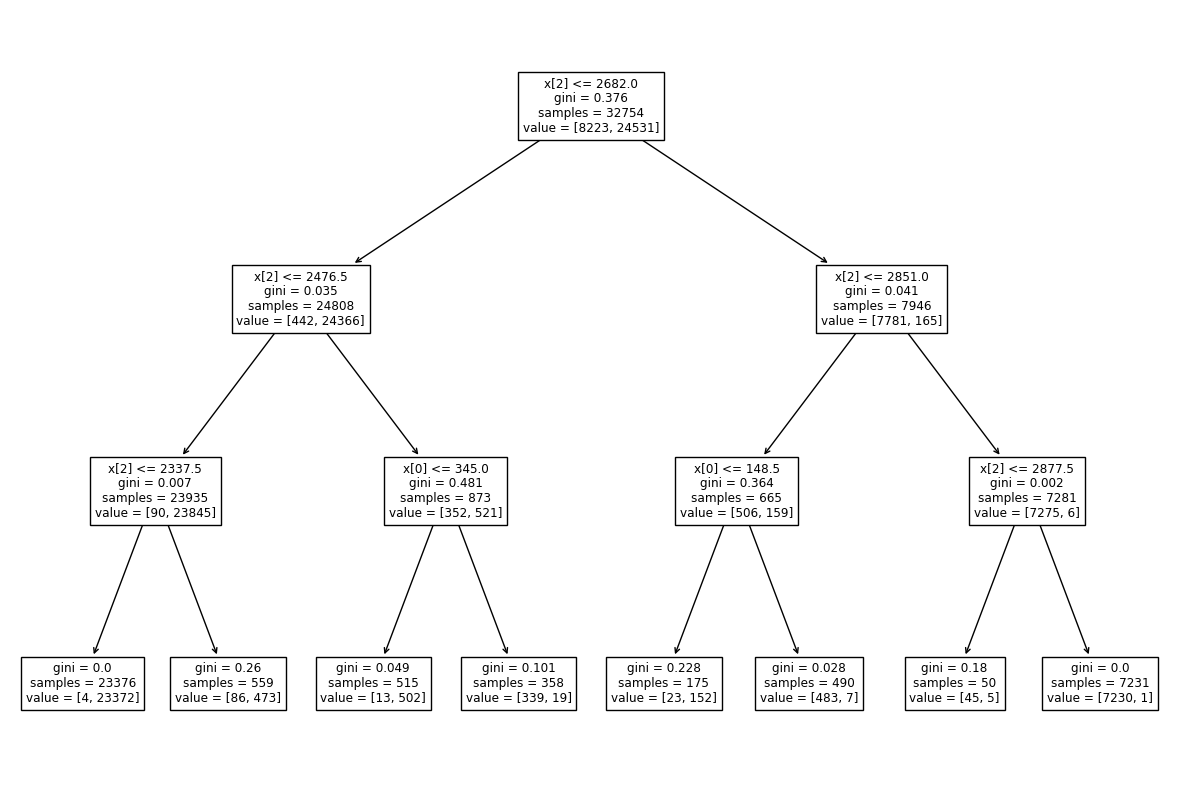

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(myDT)

plt.show()

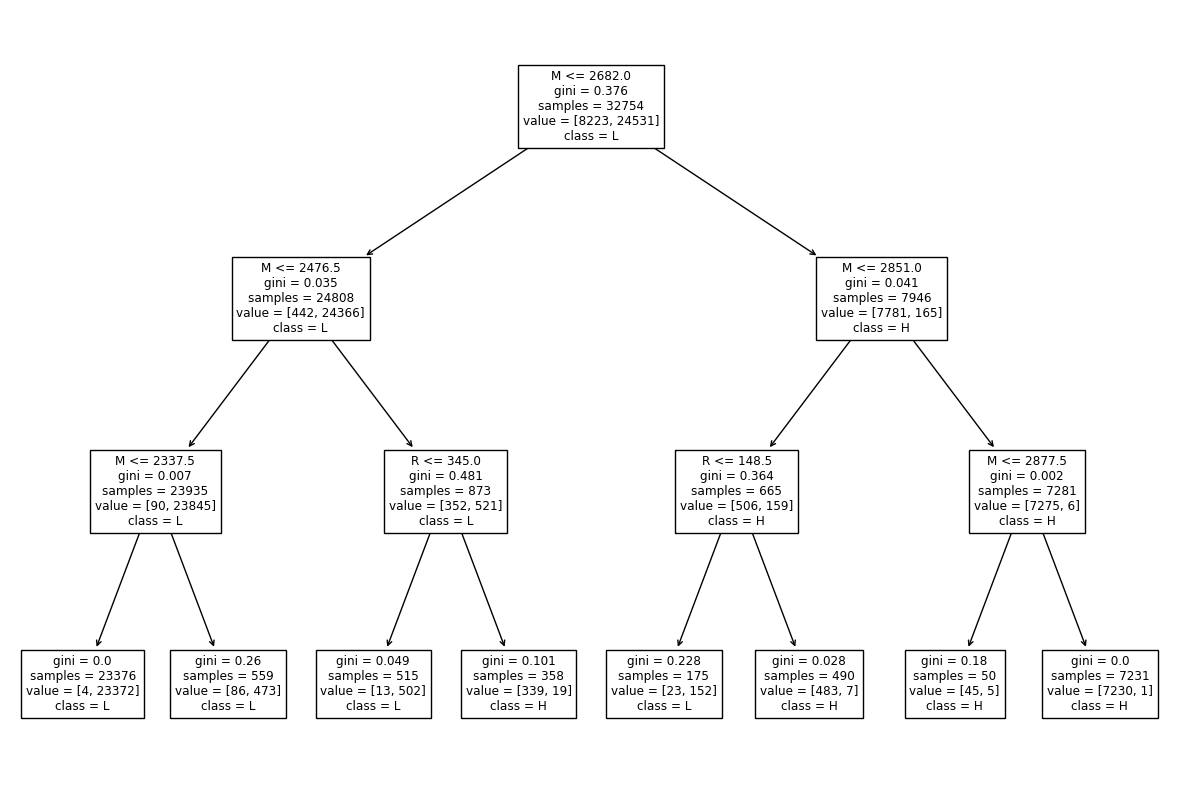

In [23]:
plt.figure(figsize=(15,10))
A=['H', 'L']
F=['R', 'F', 'M']
plot_tree(myDT, feature_names=F, class_names=A)

plt.show()